In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sahilislam007/letterbox-movie-classification-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.85M/1.85M [00:00<00:00, 2.66MB/s]

Extracting files...
Path to dataset files: C:\Users\saide\.cache\kagglehub\datasets\sahilislam007\letterbox-movie-classification-dataset\versions\1


In [2]:
#  https://www.kaggle.com/datasets/sahilislam007/letterbox-movie-classification-dataset 
# where the dataset was taken from

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

## Data Preprocessing

#### 1) Data Cleaning

In [4]:
df = pd.read_csv("letterbox_movie_dataset.csv")
df.head()

,Index,Film_title,Director,Average_rating,Genres,Runtime,Original_language,Description,Studios,Watches,List_appearances,Likes,Fans,Lowest★,Medium★★★,Highest★★★★★,Total_ratings
0,0,The Fan,Eckhart Schmidt,3.57,"['Horror', 'Drama']",92.0,German,The hero-worship that Simone has for a pop sin...,['Barbara Moorse Workshop'],12841,11032,3763,79,129,1660,714,9042
1,1,Mad Max: Fury Road,George Miller,4.18,"['Adventure', 'Science Fiction', 'Action']",121.0,English,An apocalyptic story set in the furthest reach...,"['Warner Bros. Pictures', 'Village Roadshow Pi...",2488721,331681,927538,38000,12530,158356,511140,1682389
2,2,Suspiria,Dario Argento,3.93,['Horror'],99.0,English,An American newcomer to a prestigious German b...,['Seda Spettacoli'],618171,220094,219548,13000,2814,53427,88628,443757
3,3,Lost in Translation,Sofia Coppola,3.79,"['Drama', 'Comedy', 'Romance']",102.0,English,"Two lost souls visiting Tokyo -- the young, ne...","['American Zoetrope', 'Elemental Films']",1596190,254180,493248,38000,15167,155110,193717,1076949
4,4,Akira,Katsuhiro Otomo,4.28,"['Animation', 'Action', 'Science Fiction']",124.0,Japanese,A secret military project endangers Neo-Tokyo ...,"['MBS', 'Sumitomo Corporation', 'TOHO', 'Studi...",873068,175586,341567,21000,1822,40850,196532,600721


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Index              10000 non-null  int64  
 1   Film_title         10000 non-null  object 
 2   Director           10000 non-null  object 
 3   Average_rating     10000 non-null  float64
 4   Genres             10000 non-null  object 
 5   Runtime            10000 non-null  float64
 6   Original_language  10000 non-null  object 
 7   Description        10000 non-null  object 
 8   Studios            10000 non-null  object 
 9   Watches            10000 non-null  int64  
 10  List_appearances   10000 non-null  int64  
 11  Likes              10000 non-null  int64  
 12  Fans               10000 non-null  int64  
 13  Lowest★            10000 non-null  int64  
 14  Medium★★★          10000 non-null  int64  
 15  Highest★★★★★       10000 non-null  int64  
 16  Total_ratings      1000

In [6]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
num_col = [col for col in df.columns if df[col].dtype != 'object']

print('Categorical columns: ', cat_col)
print('Numerical columns: ', num_col)

Categorical columns:  ['Film_title', 'Director', 'Genres', 'Original_language', 'Description', 'Studios']
Numerical columns:  ['Index', 'Average_rating', 'Runtime', 'Watches', 'List_appearances', 'Likes', 'Fans', 'Lowest★', 'Medium★★★', 'Highest★★★★★', 'Total_ratings']


In [7]:
import ast
from itertools import chain

df_cleaned = df[df['Genres'] != 'Unknown'].copy()

df_cleaned['genre_clean'] = df_cleaned['Genres'].apply(ast.literal_eval)

all_genres = sorted(set(chain.from_iterable(df_cleaned['genre_clean'])))

genre_to_num = {genre: idx for idx, genre in enumerate(all_genres)}

print("Genres:", len(genre_to_num), genre_to_num)
print(all_genres)

Genres: 27 {'Action': 0, 'Adventure': 1, 'Animation': 2, 'Captivating vision and Shakespearean drama': 3, 'Comedy': 4, 'Crime': 5, 'Documentary': 6, 'Drama': 7, 'Epic adventure and breathtaking battles': 8, 'Epic heroes': 9, 'Epic history and literature': 10, 'Family': 11, 'Fantasy': 12, 'Fantasy adventure, heroism, and swordplay': 13, 'Historical battles and epic heroism': 14, 'History': 15, 'Horror': 16, 'Music': 17, 'Mystery': 18, 'Romance': 19, 'Science Fiction': 20, 'Show All…': 21, 'Superheroes in action-packed battles with villains': 22, 'TV Movie': 23, 'Thriller': 24, 'War': 25, 'Western': 26}
['Action', 'Adventure', 'Animation', 'Captivating vision and Shakespearean drama', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Epic adventure and breathtaking battles', 'Epic heroes', 'Epic history and literature', 'Family', 'Fantasy', 'Fantasy adventure, heroism, and swordplay', 'Historical battles and epic heroism', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 

In [8]:
from collections import Counter
from itertools import chain

all_genre_entries = list(chain.from_iterable(df_cleaned['genre_clean']))

genre_counts = Counter(all_genre_entries)

genre_freq_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

print(genre_freq_df)


                                                Genre  Count
1                                               Drama   4416
5                                              Comedy   2932
10                                           Thriller   2312
4                                              Action   2074
0                                              Horror   1812
14                                              Crime   1523
2                                           Adventure   1448
6                                             Romance   1373
3                                     Science Fiction   1265
8                                             Fantasy    995
9                                             Mystery    835
16                                             Family    718
7                                           Animation    689
13                                            History    451
11                                        Documentary    430
12                      

In [9]:
unique_languages = df['Original_language'].unique()
print("Languages: ", len(unique_languages))


Languages:  57


In [10]:
language_counts = df_cleaned['Original_language'].value_counts()

language_to_num = {lang: idx for idx, lang in enumerate(sorted(unique_languages))}

df_cleaned['language_id'] = df_cleaned['Original_language'].map(language_to_num)

print(language_to_num)


{'Akan': 0, 'Albanian': 1, 'Arabic': 2, 'Armenian': 3, 'Bambara': 4, 'Bengali, Bangla': 5, 'Cantonese': 6, 'Chinese': 7, 'Croatian': 8, 'Czech': 9, 'Danish': 10, 'Dutch': 11, 'Eastern Punjabi, Eastern Panjabi': 12, 'English': 13, 'Esperanto': 14, 'Estonian': 15, 'Finnish': 16, 'French': 17, 'Georgian': 18, 'German': 19, 'Greek (modern)': 20, 'Hebrew (modern)': 21, 'Hindi': 22, 'Hungarian': 23, 'Icelandic': 24, 'Indonesian': 25, 'Italian': 26, 'Japanese': 27, 'Kinyarwanda': 28, 'Korean': 29, 'Lao': 30, 'Lithuanian': 31, 'Malayalam': 32, 'Mayan': 33, 'Mongolian': 34, 'Nepali': 35, 'No spoken language': 36, 'Norwegian': 37, 'Persian (Farsi)': 38, 'Polish': 39, 'Portuguese': 40, 'Romanian': 41, 'Russian': 42, 'Serbian': 43, 'Serbo-Croatian': 44, 'Slovak': 45, 'Somali': 46, 'Spanish': 47, 'Swahili': 48, 'Swedish': 49, 'Tagalog': 50, 'Tamil': 51, 'Telugu': 52, 'Thai': 53, 'Turkish': 54, 'Ukrainian': 55, 'Unknown': 56}


In [47]:

df_cleaned['genre_ids'] = df_cleaned['genre_clean'].apply(lambda genres: [genre_to_num[g] for g in genres])
df_cleaned.head()

,Index,Film_title,Director,Average_rating,Genres,Runtime,Original_language,Description,Studios,Watches,List_appearances,Likes,Fans,Lowest★,Medium★★★,Highest★★★★★,Total_ratings,genre_clean,genre_ids,language_id
0,0,The Fan,Eckhart Schmidt,3.57,"['Horror', 'Drama']",92.0,German,The hero-worship that Simone has for a pop sin...,['Barbara Moorse Workshop'],12841,11032,3763,79,129,1660,714,9042,"[Horror, Drama]","[16, 7]",19
1,1,Mad Max: Fury Road,George Miller,4.18,"['Adventure', 'Science Fiction', 'Action']",121.0,English,An apocalyptic story set in the furthest reach...,"['Warner Bros. Pictures', 'Village Roadshow Pi...",2488721,331681,927538,38000,12530,158356,511140,1682389,"[Adventure, Science Fiction, Action]","[1, 20, 0]",13
2,2,Suspiria,Dario Argento,3.93,['Horror'],99.0,English,An American newcomer to a prestigious German b...,['Seda Spettacoli'],618171,220094,219548,13000,2814,53427,88628,443757,[Horror],[16],13
3,3,Lost in Translation,Sofia Coppola,3.79,"['Drama', 'Comedy', 'Romance']",102.0,English,"Two lost souls visiting Tokyo -- the young, ne...","['American Zoetrope', 'Elemental Films']",1596190,254180,493248,38000,15167,155110,193717,1076949,"[Drama, Comedy, Romance]","[7, 4, 19]",13
4,4,Akira,Katsuhiro Otomo,4.28,"['Animation', 'Action', 'Science Fiction']",124.0,Japanese,A secret military project endangers Neo-Tokyo ...,"['MBS', 'Sumitomo Corporation', 'TOHO', 'Studi...",873068,175586,341567,21000,1822,40850,196532,600721,"[Animation, Action, Science Fiction]","[2, 0, 20]",27


## EDA

In [12]:
df_cleaned.describe()

,Index,Average_rating,Runtime,Watches,List_appearances,Likes,Fans,Lowest★,Medium★★★,Highest★★★★★,Total_ratings,language_id
count,9976.000000,9976.000000,9976.000000,9.976000e+03,9976.000000,9.976000e+03,9976.000000,9976.000000,9976.000000,9.976000e+03,9.976000e+03,9976.000000
mean,4994.648957,3.268520,103.313103,1.707222e+05,26932.243885,4.383956e+04,1656.521151,1841.627706,17929.959503,1.821517e+04,1.066471e+05,15.450882
std,2887.024222,0.525974,37.891443,4.590089e+05,56804.793662,1.516985e+05,9379.171059,5623.553490,43756.923636,8.332992e+04,2.950428e+05,6.976537
min,0.000000,1.080000,2.000000,2.000000e+00,33.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,2494.750000,2.950000,89.000000,3.027250e+03,1686.000000,4.640000e+02,2.000000,35.000000,428.000000,6.000000e+01,1.919000e+03,13.000000
50%,4991.500000,3.268535,99.000000,1.859100e+04,6542.000000,3.416000e+03,24.000000,182.000000,2458.000000,5.755000e+02,1.196200e+04,13.000000
75%,7493.250000,3.620000,113.000000,1.087855e+05,24093.750000,2.019875e+04,284.250000,1090.500000,12772.250000,4.603000e+03,6.773300e+04,13.000000
max,10001.000000,4.710000,907.000000,5.195503e+06,803670.000000,2.730813e+06,326000.000000,176637.000000,629879.000000,2.010363e+06,4.091037e+06,56.000000


In [13]:
df_cleaned.columns.tolist()

['Index',
 'Film_title',
 'Director',
 'Average_rating',
 'Genres',
 'Runtime',
 'Original_language',
 'Description',
 'Studios',
 'Watches',
 'List_appearances',
 'Likes',
 'Fans',
 'Lowest★',
 'Medium★★★',
 'Highest★★★★★',
 'Total_ratings',
 'genre_clean',
 'language_id']

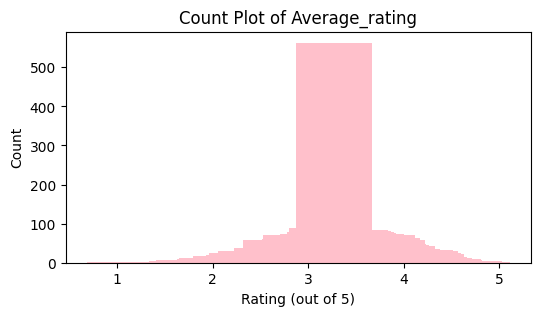

In [26]:
rating_counts = df_cleaned['Average_rating'].value_counts()

plt.figure(figsize=(6, 3))
plt.bar(rating_counts.index, rating_counts, color='pink')
plt.title('Count Plot of Average_rating')
plt.xlabel('Rating (out of 5)')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Count')

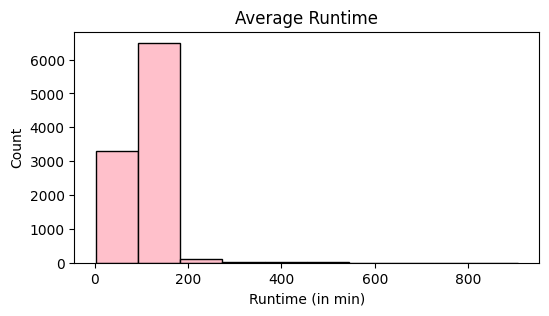

In [24]:
plt.figure(figsize=(6, 3))
plt.hist(df_cleaned['Runtime'], color='pink', edgecolor='black')
plt.title('Average Runtime')
plt.xlabel('Runtime (in min)')
plt.ylabel('Count')

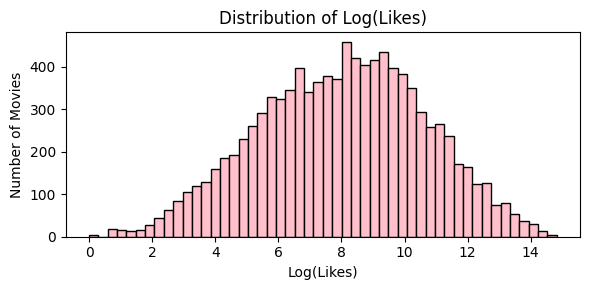

In [27]:
plt.figure(figsize=(6, 3))
plt.hist(np.log1p(df['Likes']), bins=50, color='pink', edgecolor='black')
plt.title('Distribution of Log(Likes)')
plt.xlabel('Log(Likes)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

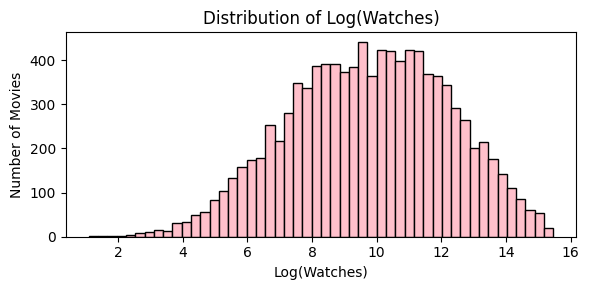

In [28]:
plt.figure(figsize=(6, 3))
plt.hist(np.log1p(df['Watches']), bins=50, color='pink', edgecolor='black')
plt.title('Distribution of Log(Watches)')
plt.xlabel('Log(Watches)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

## Top 10 Genres

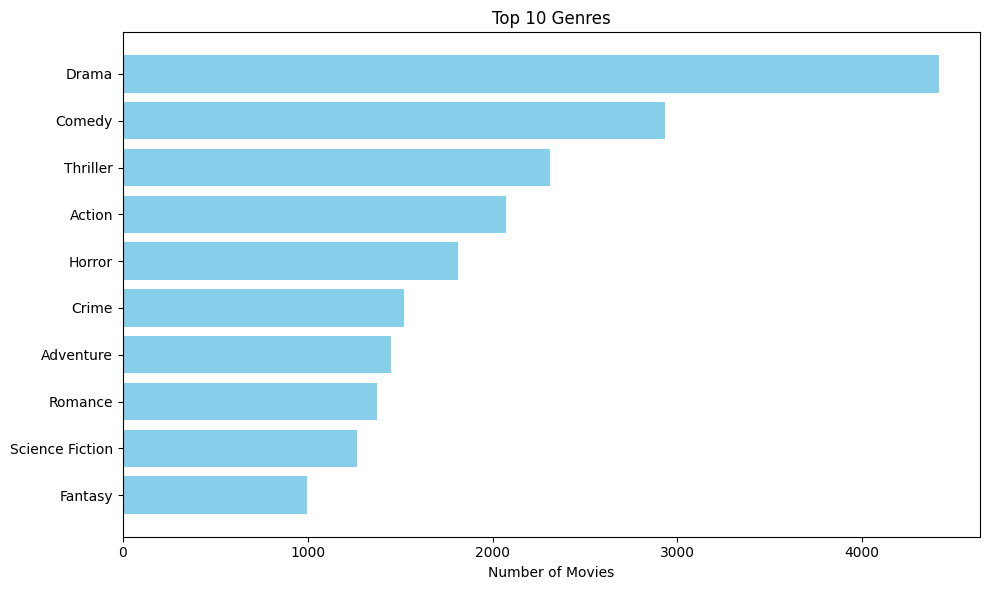

In [30]:
top_genres = genre_counts.most_common(10)
genres, counts = zip(*top_genres)

plt.figure(figsize=(10, 6))
plt.barh(genres, counts, color='skyblue')
plt.xlabel('Number of Movies')
plt.title('Top 10 Genres')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## Top 10 Origin_Languages of the Movies

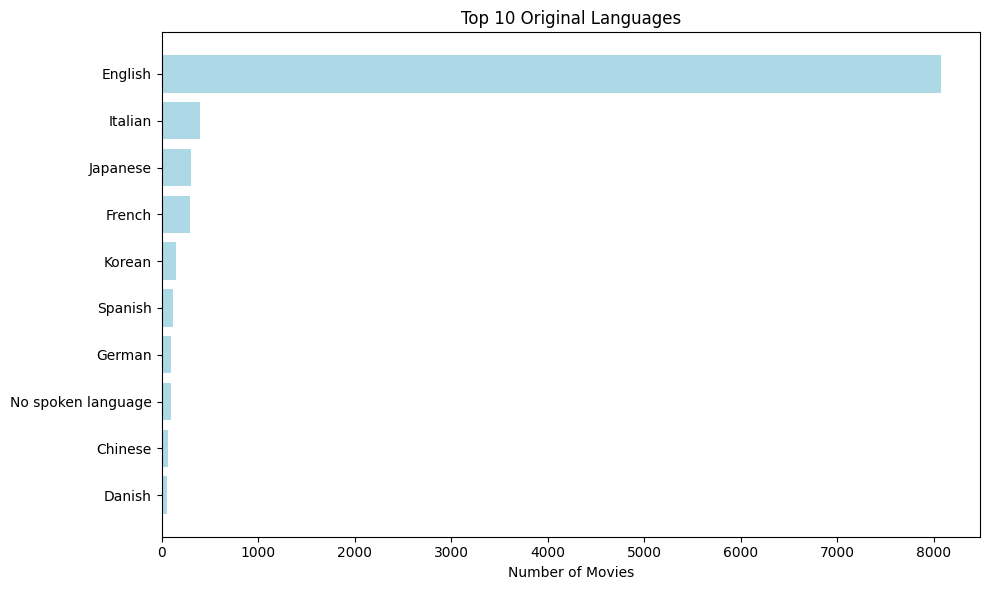

In [33]:
language_counts = df['Original_language'].value_counts().head(10)

plt.figure(figsize=(10, 6))
plt.barh(language_counts.index, language_counts.values, color='lightblue')
plt.xlabel('Number of Movies')
plt.title('Top 10 Original Languages')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Average rating per Genre

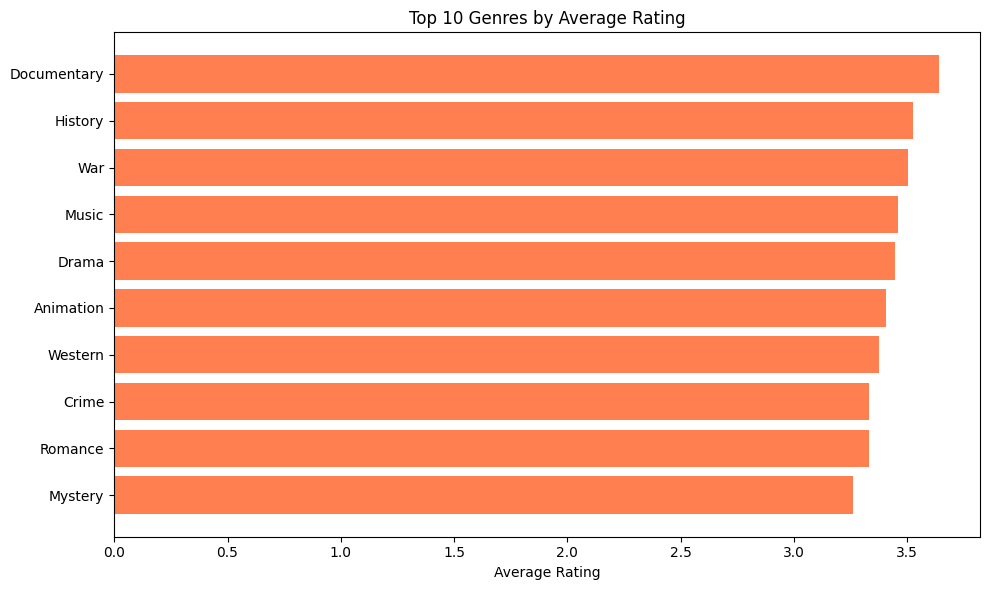

In [39]:
from collections import defaultdict

genre_ratings = defaultdict(list)

for genres, rating in zip(df_cleaned['genre_clean'], df_cleaned['Average_rating']):
    for genre in genres:
        genre_ratings[genre].append(rating)

avg_rating_per_genre = {
    genre: sum(ratings)/len(ratings) for genre, ratings in genre_ratings.items()
}

sorted_avg = sorted(avg_rating_per_genre.items(), key=lambda x: x[1], reverse=True)
genres, avg_ratings = zip(*sorted_avg[:10])  # top 10

plt.figure(figsize=(10, 6))
plt.barh(genres, avg_ratings, color='coral')
plt.xlabel('Average Rating')
plt.title('Top 10 Genres by Average Rating')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## Average Runtime per Genre

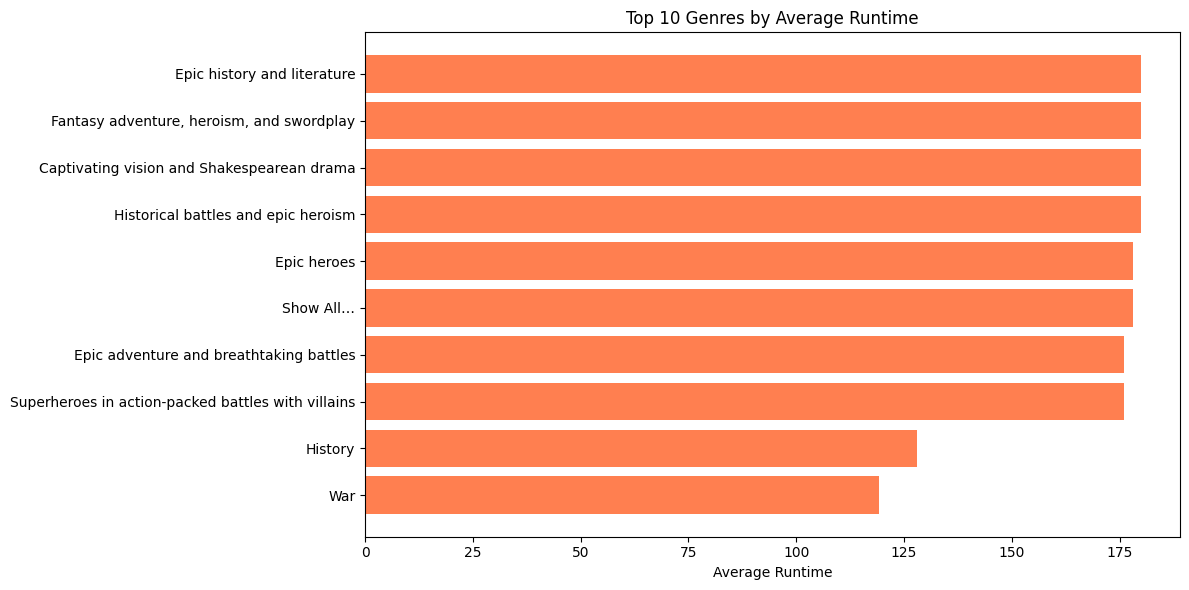

In [50]:
from collections import defaultdict

genre_runtime = defaultdict(list)

for genres, runtime in zip(df_cleaned['genre_clean'], df_cleaned['Runtime']):
    for genre in genres:
        genre_runtime[genre].append(runtime)

avg_runtime_per_genre = {
    genre: sum(runtime)/len(runtime) for genre, runtime in genre_runtime.items()
}

sorted_avg = sorted(avg_runtime_per_genre.items(), key=lambda x: x[1], reverse=True)
genres, runtime = zip(*sorted_avg[:10])  # top 10

plt.figure(figsize=(12, 6))
plt.barh(genres, runtime, color='coral')
plt.xlabel('Average Runtime')
plt.title('Top 10 Genres by Average Runtime')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## TOP 10 popular Genres

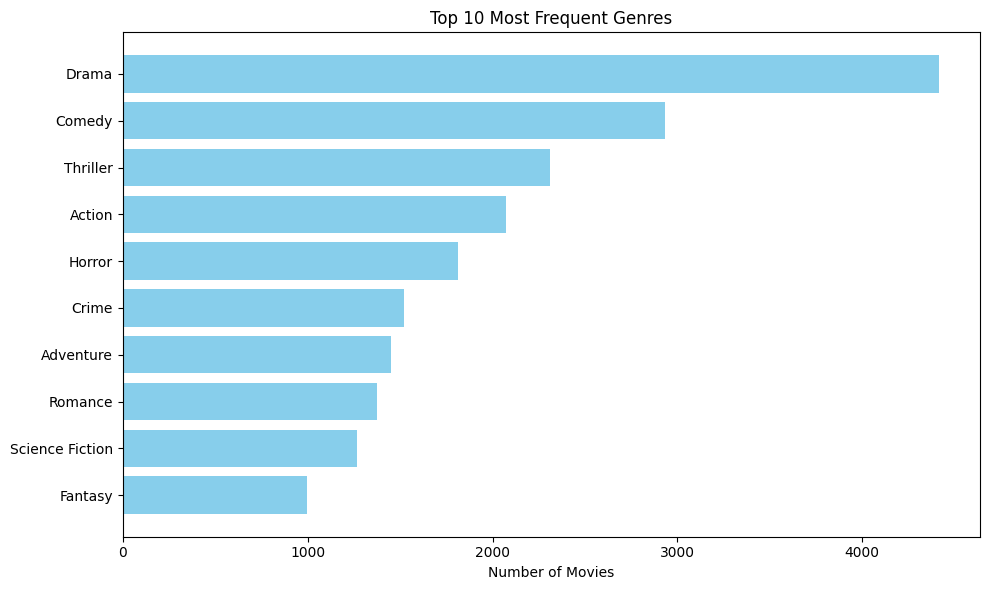

In [46]:
top_genres = genre_freq_df.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_genres['Genre'], top_genres['Count'], color='skyblue')
plt.xlabel('Number of Movies')
plt.title('Top 10 Most Frequent Genres')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Correlation Heatmap

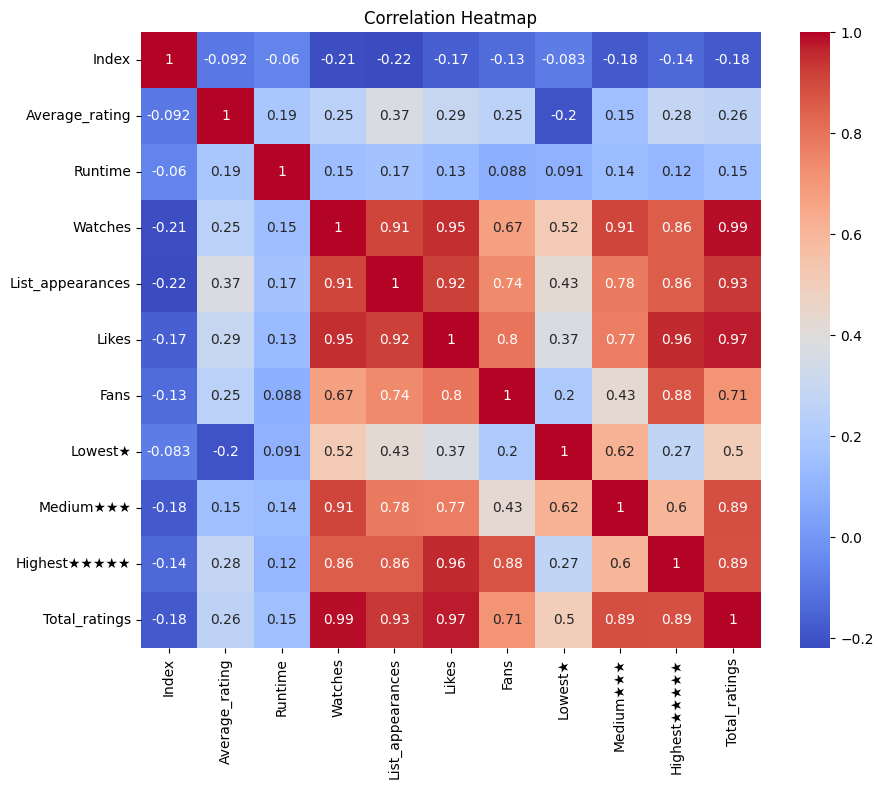

In [51]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(df[num_col].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()